In [1]:
import os
#import pyarrow
#import pysam    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
m6a_df = pd.read_csv('/gscratch/stergachislab/bmallo/large_home/fiberseq-smk/results/Plasmid_Time_Course/70_bp_nuc_snakemake/HepG2/KO_LeaGFP_HepG2_48h_nuclei/nucleosome_filtered_plasmid_reads/HepG2_48h_nuclei_chromatinized_reads.m6a.bed', delimiter='\t', header=None)

In [10]:
m6a_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,m64076_230318_142517/329266/ccs,0,4871,m64076_230318_142517/329266/ccs,43,+,0,4871,"128,0,128",1295,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,7,8,12,13,15,19,21,27,29,34,36,42,43,45,50,8..."
1,m64076_230318_142517/1902814/ccs,0,4867,m64076_230318_142517/1902814/ccs,39,+,0,4867,"128,0,128",834,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,13,25,27,31,33,35,39,42,44,45,46,54,55,58,60..."
2,m64076_230318_142517/4458277/ccs,0,4874,m64076_230318_142517/4458277/ccs,31,+,0,4874,"128,0,128",128,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,252,264,280,298,300,310,315,316,323,327,346,..."
3,m64076_230318_142517/7538634/ccs,0,4875,m64076_230318_142517/7538634/ccs,13,+,0,4875,"128,0,128",333,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,49,91,197,340,342,350,353,360,366,368,537,56..."
4,m64076_230318_142517/8522107/ccs,0,4868,m64076_230318_142517/8522107/ccs,15,+,0,4868,"128,0,128",671,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,9,11,12,14,16,17,19,20,26,28,34,35,36,37,38,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
16769,m64076_230318_142517/52233461/ccs,0,4849,m64076_230318_142517/52233461/ccs,15,-,0,4849,"128,0,128",957,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,7,10,14,17,19,22,23,24,29,31,34,35,36,43,45,..."
16770,m64076_230318_142517/133562752/ccs,0,4836,m64076_230318_142517/133562752/ccs,27,+,0,4836,"128,0,128",1070,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,7,8,15,19,24,25,29,35,37,39,41,42,46,50,59,6..."
16771,m64076_230318_142517/143656731/ccs,0,4873,m64076_230318_142517/143656731/ccs,31,-,0,4873,"128,0,128",972,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,7,9,11,14,16,18,20,21,23,27,32,36,38,39,41,4..."
16772,m64076_230318_142517/157485688/ccs,0,4846,m64076_230318_142517/157485688/ccs,15,-,0,4846,"128,0,128",1044,"0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,55,95,97,99,103,106,109,112,115,121,128,129,..."


405.63552910785126


<AxesSubplot:>

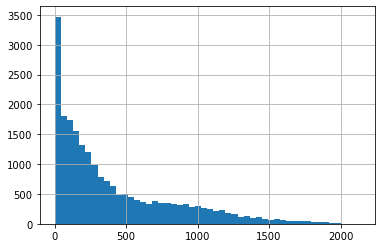

In [11]:
# m6a mean from all bed file
all_m6a_df = all_df[["m6a"]]
all_m6a_df
all_m6a_df = all_m6a_df.assign(m6a_count=all_m6a_df["m6a"].str.split(",").str.len())
print(all_m6a_df["m6a_count"].mean())
all_m6a_df["m6a_count"].hist(bins=50)

In [27]:
#m6a mean from m6a bed file
m6a_df = m6a_df.rename(columns={11: "m6a"})
m6a_df = m6a_df.assign(m6a_count=m6a_df["m6a"].str.split(",").str.len() - 2)

# calculate the 12.5th and 87.5th quantiles of the m6a_counts column
q1 = m6a_df['m6a_count'].quantile(0.25)
q2 = m6a_df['m6a_count'].quantile(0.875)

# print(q1)
# print(q2)

# filter the dataframe to remove the top and bottom 12.5% of values in the m6a_counts column
df_filtered = m6a_df.loc[(m6a_df['m6a_count'] >= q1) & (m6a_df['m6a_count'] <= q2)]
print(f'minimum methylation = {df_filtered["m6a_count"].min()}')
print(f'maximum methylation = {df_filtered["m6a_count"].max()}')

# view the filtered dataframe
df_filtered = df_filtered.drop(columns=["m6a_count"])
df_filtered.rename(columns={"m6a": 11}, inplace=True)



# Define the output file name
output_file = "/gscratch/stergachislab/bmallo/large_home/hmm-footprint-caller/HepG2_48h_nuclei/Infiles/bed/nucleosomes_10-25_methylation_127-831.m6a.bed"

# Write the filtered dataframe to a BED12 file format
df_filtered.to_csv(output_file, sep="\t", index=False, header=False)

minimum methylation = 127
maximum methylation = 831


In [4]:
 read_info = pd.read_parquet('/gscratch/stergachislab/bmallo/large_home/hmm-footprint-caller/HepG2_48h_nuclei/Infiles/parquet/KO_LeaGFP_HepG2_48h_nuclei.4800_4900bp_plasmid.fiberseq.m6a/KO_LeaGFP_HepG2_48h_nuclei.4800_4900bp_plasmid.fiberseq.m6a_read-info.pq')
read_info

,chrom,start,end,rid


580.2660377358491


<AxesSubplot:>

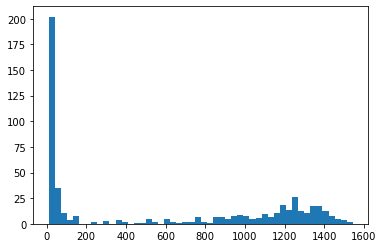

In [85]:
#m6a mean from 8 nucleosome reads

eight_nuc_df = pd.read_csv("/gscratch/stergachislab/bmallo/large_home/fiberseq-smk/results/Plasmid_Time_Course/70_bp_nuc_snakemake/HepG2/KO_LeaGFP_HepG2_48h_nuclei/nucleosome_filtered_plasmid_reads/HepG2_48h_nuclei_8_nucleosome_reads.m6a.bed", sep="\t", header=None)
eight_nuc_df = eight_nuc_df.rename(columns={11: "m6a"})
eight_nuc_df = eight_nuc_df[["m6a"]]
eight_nuc_df = eight_nuc_df.assign(m6a_count=eight_nuc_df["m6a"].str.split(",").str.len() - 2)
#eight_nuc_df = eight_nuc_df[eight_nuc_df["m6a_count"] < 200]
eight_nuc_df
print(eight_nuc_df["m6a_count"].mean())
eight_nuc_df["m6a_count"].hist(bins=50, grid=False)

In [60]:
#m6a mean from 23 nucleosome reads

twentyfive_nuc_df = pd.read_csv("/gscratch/stergachislab/bmallo/large_home/fiberseq-smk/results/Plasmid_Time_Course/70_bp_nuc_snakemake/HepG2/KO_LeaGFP_HepG2_48h_nuclei/nucleosome_filtered_plasmid_reads/HepG2_48h_nuclei_25_nucleosome_reads.m6a.bed", sep="\t", header=None)



In [37]:
input_bamfile = "/gscratch/stergachislab/bmallo/large_home/fiberseq-smk/results/Plasmid_Time_Course/70_bp_nuc_snakemake/HepG2/KO_LeaGFP_HepG2_48h_nuclei/KO_LeaGFP_HepG2_48h_nuclei.fiberseq.bam"

ref_name = "linear_LeaGFP"
min_read_length = 4800
max_read_length = 4900

ns_list = []

with pysam.AlignmentFile(input_bamfile, "rb") as bamfile:

        for read in bamfile.fetch(ref_name):
            ns_count = len(list(read.get_tag("ns")))
            ns_list.append(ns_count)